In [1]:
# Load Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import seaborn as sns
from matplotlib.pyplot import figure
from bs4 import BeautifulSoup
import time
import requests     
import shutil      
import datetime
from scipy.stats import norm
from random import randint
import  random
import os
os.chdir('C:/Users/Travis/OneDrive/Data Science/Personal_Projects/Sports/UFC_Prediction_V2')
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup 
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
import requests
import json
from random import randint
import  random
import os
from cmath import nan
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
import pickle
from sklearn.metrics import fbeta_score
import winsound
from bs4 import BeautifulSoup
import time
import plotly.express as px

In [43]:
# load
df  = pd.read_csv('data/final/aggregates/Double_Fights_DF_V15.csv') 
df.head(3)

Unnamed: 0.2  Unnamed: 0      Fighter_A      Fighter_B  A_Kd  B_Kd  \
0             0           0     Holly Holm   Irene Aldana     0     0   
1             1           1     Greg Hardy     Ben Sosoli     0     0   
2             2           2  Jared Rosholt  Josh Copeland     0     0   

   A_Sig_strike_land  A_Sig_strike_att  B_Sig_strike_land  B_Sig_strike_att  \
0                154               301                 69               185   
1                 54               105                 26                97   
2                 22                45                  9                36   

   ...  A_Martial_Art_Instructor_2  B_Martial_Art_Instructor_2  \
0  ...             Mike Winkeljohn     Instructor: Juan Carlos   
1  ...                  Din Thomas             John Wayne Parr   
2  ...         Coach Bobby Douglas                  John Smith   

   A_Martial_Art_Year_Started_2  B_Martial_Art_Year_Started_2  \
0                        1993.0                        2009.0   
1                        2011.0                        2012.0   
2                        2003.0                        2013.0   

       A_Martial_Art_3      B_Martial_Art_3  A_Martial_Art_Instructor_3  \
0            Muay Thai  Brazilian Jiu-Jitsu             Mike Winkeljohn   
1               Boxing               Boxing                  Din Thomas   
2  Brazilian Jiu-Jitsu  Brazilian Jiu-Jitsu       Professor Jason Tooke   

   B_Martial_Art_Instructor_3  A_Martial_Art_Year_Started_3  \
0  Instructor: Gustavo Dantas                        2001.0   
1             John Wayne Parr                        2012.0   
2           Carlos Gracie Jr.                        2007.0   

   B_Martial_Art_Year_Started_3  
0                        2012.0  
1                        2013.0  
2                        2016.0  

[3 rows x 708 columns]

In [44]:
df.describe()

Unnamed: 0.2   Unnamed: 0         A_Kd         B_Kd  A_Sig_strike_land  \
count   8244.000000  8244.000000  8244.000000  8244.000000        8244.000000   
mean    4425.798884  4425.798884     0.222101     0.222101          38.120815   
std     2546.638351  2546.638351     0.499949     0.499949          31.926436   
min        0.000000     0.000000     0.000000     0.000000           0.000000   
25%     2220.750000  2220.750000     0.000000     0.000000          14.000000   
50%     4411.500000  4411.500000     0.000000     0.000000          31.000000   
75%     6632.250000  6632.250000     0.000000     0.000000          54.000000   
max     8823.000000  8823.000000     5.000000     5.000000         445.000000   

       A_Sig_strike_att  B_Sig_strike_land  B_Sig_strike_att  \
count       8244.000000        8244.000000       8244.000000   
mean          86.486900          38.120815         86.486900   
std           69.919124          31.926436         69.919124   
min            0.000000           0.000000          0.000000   
25%           32.000000          14.000000         32.000000   
50%           71.000000          31.000000         71.000000   
75%          124.000000          54.000000        124.000000   
max          744.000000         445.000000        744.000000   

       A_Sig_strike_percent  B_Sig_strike_percent  ...  \
count           8244.000000           8244.000000  ...   
mean               0.449027              0.449027  ...   
std                0.161339              0.161339  ...   
min                0.000000              0.000000  ...   
25%                0.350000              0.350000  ...   
50%                0.440000              0.440000  ...   
75%                0.550000              0.550000  ...   
max                1.000000              1.000000  ...   

       Dif_Opp_Avg_Head_Strikes_land_per_round  \
count                               7632.00000   
mean                                       NaN   
std                                        NaN   
min                                       -inf   
25%                                   -4.48698   
50%                                    0.00000   
75%                                    4.48698   
max                                        inf   

       Dif_Opp_Avg_Head_Strikes_att_per_round  \
count                             7638.000000   
mean                                      NaN   
std                                       NaN   
min                                      -inf   
25%                                -11.608609   
50%                                  0.000000   
75%                                 11.608609   
max                                       inf   

       Dif_Opp_Avg_Total_Strikes_land_per_round  \
count                               7638.000000   
mean                                        NaN   
std                                         NaN   
min                                        -inf   
25%                                   -9.746897   
50%                                    0.000000   
75%                                    9.746897   
max                                         inf   

       Dif_Opp_Avg_Total_Strikes_att_per_round  A_Martial_Art_Year_Started_1  \
count                              7640.000000                   7689.000000   
mean                                       NaN                   2002.062427   
std                                        NaN                     10.798878   
min                                       -inf                   1590.000000   
25%                                 -18.508383                   1999.000000   
50%                                   0.000000                   2003.000000   
75%                                  18.508383                   2007.000000   
max                                        inf                   2018.000000   

       B_Martial_Art_Year_Started_1  A_Martial_Art_Year_Started_2  \
count                   7689.00000

View Columns and Missing Values

In [50]:
cols = df.columns.to_list()
cols

['Unnamed: 0.2',
 'Unnamed: 0',
 'Fighter_A',
 'Fighter_B',
 'A_Kd',
 'B_Kd',
 'A_Sig_strike_land',
 'A_Sig_strike_att',
 'B_Sig_strike_land',
 'B_Sig_strike_att',
 'A_Sig_strike_percent',
 'B_Sig_strike_percent',
 'A_Total_Strikes_land',
 'A_Total_Strikes_att',
 'B_Total_Strikes_land',
 'B_Total_Strikes_att',
 'A_Total_Strikes_percent',
 'B_Total_Strikes_percent',
 'A_Takedowns_land',
 'A_Takedowns_att',
 'B_Takedowns_land',
 'B_Takedowns_att',
 'A_Takedown_percent',
 'B_Takedown_percent',
 'A_Sub_Attempts_land',
 'A_Sub_Attempts_att',
 'B_Sub_Attempts_land',
 'B_Sub_Attempts_att',
 'A_Rev',
 'B_Rev',
 'A_Ctrl_time_min',
 'A_Ctrl_time_sec',
 'B_Ctrl_time_min',
 'B_Ctrl_time_sec',
 'A_Ctrl_time_tot',
 'B_Ctrl_time_tot',
 'details',
 'event_title',
 'event_url',
 'date',
 'Winner',
 'fight_id',
 'A_Head_Strikes_land',
 'A_Head_Strikes_att',
 'B_Head_Strikes_land',
 'B_Head_Strikes_att',
 'A_Head_Strikes_percent',
 'B_Head_Strikes_percent',
 'A_Body_Strikes_land',
 'A_Body_Strikes_att',


There are 670 columns in the dataset. Let's organize the columns by category to see what we're working with.

In [51]:
columns_by_category = {
    'In_Fight_Metrics': [
        'A_Kd', 'B_Kd', 'A_Sig_strike_land', 'A_Sig_strike_att', 'B_Sig_strike_land', 'B_Sig_strike_att', 
        'A_Sig_strike_percent', 'B_Sig_strike_percent', 'A_Total_Strikes_land', 'A_Total_Strikes_att', 
        'B_Total_Strikes_land', 'B_Total_Strikes_att', 'A_Total_Strikes_percent', 'B_Total_Strikes_percent', 
        'A_Takedowns_land', 'A_Takedowns_att', 'B_Takedowns_land', 'B_Takedowns_att', 'A_Takedown_percent', 
        'B_Takedown_percent', 'A_Sub_Attempts_land', 'A_Sub_Attempts_att', 'B_Sub_Attempts_land', 
        'B_Sub_Attempts_att', 'A_Rev', 'B_Rev', 'A_Ctrl_time_min', 'A_Ctrl_time_sec', 'B_Ctrl_time_min', 
        'B_Ctrl_time_sec', 'A_Ctrl_time_tot', 'B_Ctrl_time_tot', 'details', 'event_title', 'event_url', 
        'date', 'Winner', 'fight_id', 'A_Head_Strikes_land', 'A_Head_Strikes_att', 'B_Head_Strikes_land', 
        'B_Head_Strikes_att', 'A_Head_Strikes_percent', 'B_Head_Strikes_percent', 'A_Body_Strikes_land', 
        'A_Body_Strikes_att', 'B_Body_Strikes_land', 'B_Body_Strikes_att', 'A_Body_Strikes_percent', 
        'B_Body_Strikes_percent', 'A_Leg_Strikes_land', 'A_Leg_Strikes_att', 'B_Leg_Strikes_land', 
        'B_Leg_Strikes_att', 'A_Leg_Strikes_percent', 'B_Leg_Strikes_percent', 'A_Distance_Strikes_land', 
        'A_Distance_Strikes_att', 'B_Distance_Strikes_land', 'B_Distance_Strikes_att', 
        'A_Distance_Strikes_percent', 'B_Distance_Strikes_percent', 'A_Clinch_Strikes_land', 
        'A_Clinch_Strikes_att', 'B_Clinch_Strikes_land', 'B_Clinch_Strikes_att', 'A_Clinch_Strikes_percent', 
        'B_Clinch_Strikes_percent', 'A_Ground_Strikes_land', 'A_Ground_Strikes_att', 'B_Ground_Strikes_land', 
        'B_Ground_Strikes_att', 'A_Ground_Strikes_percent', 'B_Ground_Strikes_percent', 'Dif_Kd', 
        'Dif_Sig_strike_land', 'Dif_Sig_strike_att', 'Dif_Sig_strike_percent', 'Dif_Total_Strikes_land', 
        'Dif_Total_Strikes_att', 'Dif_Total_Strikes_percent', 'Dif_Takedowns_land', 'Dif_Takedowns_att', 
        'Dif_Takedown_percent', 'Dif_Sub_Attempts_land', 'Dif_Sub_Attempts_att', 'Dif_Rev', 
        'Dif_Ctrl_time_min', 'Dif_Ctrl_time_sec', 'Dif_Ctrl_time_tot', 'Dif_Head_Strikes_land', 
        'Dif_Head_Strikes_att', 'Dif_Head_Strikes_percent','Dif_Body_Strikes_land', 
        'Dif_Body_Strikes_att', 'Dif_Body_Strikes_percent', 'Dif_Leg_Strikes_land', 
        'Dif_Leg_Strikes_att', 'Dif_Leg_Strikes_percent', 'Dif_Distance_Strikes_land', 'Dif_Distance_Strikes_att', 
        'Dif_Distance_Strikes_percent', 'Dif_Clinch_Strikes_land', 'Dif_Clinch_Strikes_att', 
        'Dif_Clinch_Strikes_percent', 'Dif_Ground_Strikes_land', 'Dif_Ground_Strikes_att', 
        'Dif_Ground_Strikes_percent', 'InFightData__Method_Primary', 'InFightData__Method_Detail', 
        'InFightData__Round', 'InFightData__Time'
    ],
    'Previous_Opponent_Metrics': [
        'A_Opp_Avg_Head_Strikes_percent', 'B_Opp_Avg_Head_Strikes_percent', 'A_Opp_Avg_Body_Strikes_land', 
        'B_Opp_Avg_Body_Strikes_land', 'A_Opp_Avg_Body_Strikes_att', 'B_Opp_Avg_Body_Strikes_att', 
        'A_Opp_Avg_Body_Strikes_percent', 'B_Opp_Avg_Body_Strikes_percent', 'A_Opp_Avg_Leg_Strikes_land', 
        'B_Opp_Avg_Leg_Strikes_land', 'A_Opp_Avg_Leg_Strikes_att', 'B_Opp_Avg_Leg_Strikes_att', 
        'A_Opp_Avg_Leg_Strikes_percent', 'B_Opp_Avg_Leg_Strikes_percent', 'A_Opp_Avg_Distance_Strikes_land', 
        'B_Opp_Avg_Distance_Strikes_land', 'A_Opp_Avg_Distance_Strikes_att', 'B_Opp_Avg_Distance_Strikes_att', 
        'A_Opp_Avg_Distance_Strikes_percent', 'B_Opp_Avg_Distance_Strikes_percent', 'A_Opp_Avg_Clinch_Strikes_land', 
        'B_Opp_Avg_Clinch_Strikes_land', 'A_Opp_Avg_Clinch_Strikes_att', 'B_Opp_Avg_Clinch_Strikes_att', 
        'A_Opp_Avg_Clinch_Strikes_percent', 'B_Opp_Avg_Clinch_Strikes_percent', 'A_Opp_Avg_Ground_Strikes_land', 
        'B_Opp_Avg_Ground_Strikes_land', 'A_Opp_Avg_Ground_Strikes_att', 'B_Opp_Avg_Ground_Strikes_att', 
        'A_Opp_Avg_Ground_Strikes_percent', 'B_Opp_Avg_Ground_Strikes_percent', 'A_Opp_Avg_Kd', 'B_Opp_Avg_Kd', 
        'A_Opp_Avg_Sig_strike_land', 'B_Opp_Avg_Sig_strike_land', 'A_Opp_Avg_Sig_strike_att', 
        'A_Opp_Avg_Total_Strikes_percent', 'B_Opp_Avg_Total_Strikes_percent', 'A_Opp_Avg_Takedowns_land', 
        'B_Opp_Avg_Takedowns_land', 'A_Opp_Avg_Takedowns_att', 'B_Opp_Avg_Takedowns_att', 
        'A_Opp_Avg_Takedown_percent', 'B_Opp_Avg_Takedown_percent', 'A_Opp_Avg_Sub_Attempts_land', 
        'B_Opp_Avg_Sub_Attempts_land', 'A_Opp_Avg_Sub_Attempts_att', 
        'B_Opp_Avg_Sub_Attempts_att', 'A_Opp_Avg_Rev', 'B_Opp_Avg_Rev', 'A_Opp_Avg_Ctrl_time_min', 
        'B_Opp_Avg_Ctrl_time_min', 'A_Opp_Avg_Ctrl_time_sec', 'B_Opp_Avg_Ctrl_time_sec', 'A_Opp_Avg_Ctrl_time_tot', 
        'B_Opp_Avg_Ctrl_time_tot', 'A_Opp_Avg_Head_Strikes_land', 'B_Opp_Avg_Head_Strikes_land', 
        'A_Opp_Avg_Head_Strikes_att', 'B_Opp_Avg_Head_Strikes_att', 'B_Opp_Avg_Sig_strike_att', 
        'A_Opp_Avg_Sig_strike_percent', 'B_Opp_Avg_Sig_strike_percent', 'A_Opp_Avg_Total_Strikes_land', 
        'B_Opp_Avg_Total_Strikes_land', 'A_Opp_Avg_Total_Strikes_att', 'B_Opp_Avg_Total_Strikes_att'
    ],
    'Previous_Opponent_Per_Round': [
        'A_Opp_Avg_Body_Strikes_land_per_round', 'A_Opp_Avg_Body_Strikes_att_per_round', 'A_Opp_Avg_Leg_Strikes_land_per_round',
        'A_Opp_Avg_Leg_Strikes_att_per_round', 'A_Opp_Avg_Distance_Strikes_land_per_round', 'A_Opp_Avg_Distance_Strikes_att_per_round',
        'A_Opp_Avg_Clinch_Strikes_land_per_round', 'A_Opp_Avg_Clinch_Strikes_att_per_round', 'A_Opp_Avg_Ground_Strikes_land_per_round',
        'A_Opp_Avg_Ground_Strikes_att_per_round', 'A_Opp_Avg_Kd_per_round', 'A_Opp_Avg_Sig_strike_land_per_round',
        'A_Opp_Avg_Sig_strike_att_per_round', 'A_Opp_Avg_Takedowns_land_per_round', 'A_Opp_Avg_Takedowns_att_per_round',
        'A_Opp_Avg_Sub_Attempts_land_per_round', 'A_Opp_Avg_Sub_Attempts_att_per_round', 'A_Opp_Avg_Rev_per_round',
        'A_Opp_Avg_Ctrl_time_min_per_round', 'A_Opp_Avg_Ctrl_time_sec_per_round', 'A_Opp_Avg_Ctrl_time_tot_per_round',
        'A_Opp_Avg_Head_Strikes_land_per_round', 'A_Opp_Avg_Head_Strikes_att_per_round', 'A_Opp_Avg_Total_Strikes_land_per_round',
        'A_Opp_Avg_Total_Strikes_att_per_round', 'B_Opp_Avg_Body_Strikes_land_per_round', 'B_Opp_Avg_Body_Strikes_att_per_round',
        'B_Opp_Avg_Leg_Strikes_land_per_round', 'B_Opp_Avg_Leg_Strikes_att_per_round', 'B_Opp_Avg_Distance_Strikes_land_per_round',
        'B_Opp_Avg_Distance_Strikes_att_per_round', 'B_Opp_Avg_Clinch_Strikes_land_per_round', 'B_Opp_Avg_Clinch_Strikes_att_per_round',
        'B_Opp_Avg_Ground_Strikes_land_per_round', 'B_Opp_Avg_Ground_Strikes_att_per_round', 'B_Opp_Avg_Kd_per_round',
        'B_Opp_Avg_Sig_strike_land_per_round', 'B_Opp_Avg_Takedowns_land_per_round', 'B_Opp_Avg_Takedowns_att_per_round',
        'B_Opp_Avg_Sub_Attempts_land_per_round', 'B_Opp_Avg_Sub_Attempts_att_per_round', 'B_Opp_Avg_Rev_per_round',
        'B_Opp_Avg_Ctrl_time_min_per_round', 'B_Opp_Avg_Ctrl_time_sec_per_round', 'B_Opp_Avg_Ctrl_time_tot_per_round',
        'B_Opp_Avg_Head_Strikes_land_per_round', 'B_Opp_Avg_Head_Strikes_att_per_round', 'B_Opp_Avg_Sig_strike_att_per_round',
        'B_Opp_Avg_Total_Strikes_land_per_round', 'B_Opp_Avg_Total_Strikes_att_per_round'
    ],
    'Size_Metrics':[
        'A_Height', 'B_Height', 'Dif_Height',
        'A_Reach', 'B_Reach', 'Dif_Reach',
        'A_Leg_Reach', 'B_Leg_Reach', 'Dif_Leg_Reach',
        'A_Reach_NA', 'B_Reach_NA', 'Reach_NA',
        'A_Leg_Reach_NA', 'B_Leg_Reach_NA', 'Leg_Reach_NA',
        'A_Typical_Weightclass', 'B_Typical_Weightclass', 'fight_weightclass',
        'A_Fight_in_Typical_Weightclass', 'B_Fight_in_Typical_Weightclass', 'A_Ape_Index',
        'B_Ape_Index', 'A_Leg_Index', 'B_Leg_Index',
        'A_Leg_to_Wing_Index', 'B_Leg_to_Wing_Index'
    ],
    'Odds_Metrics':[
        'Fighter_A_Odds',
        'Fighter_B_Odds',
        'Fighter_A_Odds_Change',
        'Fighter_B_Odds_Change',
        'Dif_Odds', 'favorite?'
    ],
    'Event_Info':[
        'Fighter_A',
        'Fighter_B', 'event_code', 'datetime',
        'date_formatted', 'win?'
    ],
    'Rolling_Metrics':[
        'A_Rolling_Kd_mean', 'B_Rolling_Kd_mean', 'A_Rolling_Kd_std',
        'B_Rolling_Kd_std', 'A_Rolling_Kd_median', 'B_Rolling_Kd_median',
        'A_Rolling_Sig_strike_land_mean', 'B_Rolling_Sig_strike_land_mean', 'A_Rolling_Sig_strike_land_std',
        'B_Rolling_Sig_strike_land_std', 'A_Rolling_Sig_strike_land_median', 'B_Rolling_Sig_strike_land_median',
        'A_Rolling_Sig_strike_att_mean', 'B_Rolling_Sig_strike_att_mean', 'A_Rolling_Sig_strike_att_std',
        'B_Rolling_Sig_strike_att_std', 'A_Rolling_Sig_strike_att_median', 'B_Rolling_Sig_strike_att_median',
        'A_Rolling_Sig_strike_percent_mean', 'B_Rolling_Sig_strike_percent_mean', 'A_Rolling_Sig_strike_percent_std',
        'B_Rolling_Sig_strike_percent_std', 'A_Rolling_Sig_strike_percent_median', 'B_Rolling_Sig_strike_percent_median',
        'A_Rolling_Total_Strikes_land_mean', 'B_Rolling_Total_Strikes_land_mean', 'A_Rolling_Total_Strikes_land_std',
        'B_Rolling_Total_Strikes_land_std', 'A_Rolling_Total_Strikes_land_median', 'B_Rolling_Total_Strikes_land_median',
        'A_Rolling_Total_Strikes_att_mean', 'B_Rolling_Total_Strikes_att_mean', 'A_Rolling_Total_Strikes_att_std',
        'B_Rolling_Total_Strikes_att_std', 'A_Rolling_Total_Strikes_att_median', 'B_Rolling_Total_Strikes_att_median',
        'A_Rolling_Total_Strikes_percent_mean', 'B_Rolling_Total_Strikes_percent_mean', 'A_Rolling_Total_Strikes_percent_std',
        'B_Rolling_Total_Strikes_percent_std', 'A_Rolling_Total_Strikes_percent_median', 'B_Rolling_Total_Strikes_percent_median',
        'A_Rolling_Takedowns_land_mean', 'B_Rolling_Takedowns_land_mean', 'A_Rolling_Takedowns_land_std',
        'B_Rolling_Takedowns_land_std', 'A_Rolling_Takedowns_land_median', 'B_Rolling_Takedowns_land_median',
        'A_Rolling_Takedowns_att_mean', 'B_Rolling_Takedowns_att_mean', 'A_Rolling_Takedowns_att_std',
        'B_Rolling_Takedowns_att_std', 'A_Rolling_Takedowns_att_median', 'B_Rolling_Takedowns_att_median',
        'A_Rolling_Takedown_percent_mean', 'B_Rolling_Takedown_percent_mean', 'A_Rolling_Takedown_percent_std',
        'B_Rolling_Takedown_percent_std', 'A_Rolling_Takedown_percent_median', 'B_Rolling_Takedown_percent_median',
        'A_Rolling_Sub_Attempts_land_mean', 'B_Rolling_Sub_Attempts_land_mean', 'A_Rolling_Sub_Attempts_land_std',
        'B_Rolling_Sub_Attempts_land_std', 'A_Rolling_Sub_Attempts_land_median', 'B_Rolling_Sub_Attempts_land_median',
        'A_Rolling_Sub_Attempts_att_mean', 'B_Rolling_Sub_Attempts_att_mean',
        'A_Rolling_Sub_Attempts_att_std', 'B_Rolling_Sub_Attempts_att_std', 'A_Rolling_Sub_Attempts_att_median',
        'B_Rolling_Sub_Attempts_att_median', 'A_Rolling_Rev_mean', 'B_Rolling_Rev_mean',
        'A_Rolling_Rev_std', 'B_Rolling_Rev_std', 'A_Rolling_Rev_median', 'B_Rolling_Rev_median',
        'A_Rolling_Ctrl_time_min_mean', 'B_Rolling_Ctrl_time_min_mean', 'A_Rolling_Ctrl_time_min_std',
        'B_Rolling_Ctrl_time_min_std', 'A_Rolling_Ctrl_time_min_median', 'B_Rolling_Ctrl_time_min_median',
        'A_Rolling_Ctrl_time_sec_mean', 'B_Rolling_Ctrl_time_sec_mean', 'A_Rolling_Ctrl_time_sec_std',
        'B_Rolling_Ctrl_time_sec_std', 'A_Rolling_Ctrl_time_sec_median', 'B_Rolling_Ctrl_time_sec_median',
        'A_Rolling_Ctrl_time_tot_mean', 'B_Rolling_Ctrl_time_tot_mean', 'A_Rolling_Ctrl_time_tot_std',
        'B_Rolling_Ctrl_time_tot_std', 'A_Rolling_Ctrl_time_tot_median', 'B_Rolling_Ctrl_time_tot_median',
        'A_Rolling_Head_Strikes_land_mean', 'B_Rolling_Head_Strikes_land_mean', 'A_Rolling_Head_Strikes_land_std',
        'B_Rolling_Head_Strikes_land_std', 'A_Rolling_Head_Strikes_land_median', 'B_Rolling_Head_Strikes_land_median',
        'A_Rolling_Head_Strikes_att_mean', 'B_Rolling_Head_Strikes_att_mean', 'A_Rolling_Head_Strikes_att_std',
        'B_Rolling_Head_Strikes_att_std', 'A_Rolling_Head_Strikes_att_median', 'B_Rolling_Head_Strikes_att_median',
        'A_Rolling_Head_Strikes_percent_mean', 'B_Rolling_Head_Strikes_percent_mean', 'A_Rolling_Head_Strikes_percent_std',
        'B_Rolling_Head_Strikes_percent_std', 'A_Rolling_Head_Strikes_percent_median', 'B_Rolling_Head_Strikes_percent_median',
        'A_Rolling_Body_Strikes_land_mean', 'B_Rolling_Body_Strikes_land_mean', 'A_Rolling_Body_Strikes_land_std',
        'B_Rolling_Body_Strikes_land_std', 'A_Rolling_Body_Strikes_land_median', 'B_Rolling_Body_Strikes_land_median',
        'A_Rolling_Body_Strikes_att_mean', 'B_Rolling_Body_Strikes_att_mean', 'A_Rolling_Body_Strikes_att_std',
        'B_Rolling_Body_Strikes_att_std', 'A_Rolling_Body_Strikes_att_median', 'B_Rolling_Body_Strikes_att_median',
        'A_Rolling_Body_Strikes_percent_mean', 'B_Rolling_Body_Strikes_percent_mean', 'A_Rolling_Body_Strikes_percent_std',
        'B_Rolling_Body_Strikes_percent_std', 'A_Rolling_Body_Strikes_percent_median', 'B_Rolling_Body_Strikes_percent_median',
        'A_Rolling_Leg_Strikes_land_mean', 'B_Rolling_Leg_Strikes_land_mean', 'A_Rolling_Leg_Strikes_land_std',
        'B_Rolling_Leg_Strikes_land_std', 'A_Rolling_Leg_Strikes_land_median', 'B_Rolling_Leg_Strikes_land_median',
        'A_Rolling_Leg_Strikes_att_mean', 'B_Rolling_Leg_Strikes_att_mean', 'A_Rolling_Leg_Strikes_att_std',
        'B_Rolling_Leg_Strikes_att_std', 'A_Rolling_Leg_Strikes_att_median', 'B_Rolling_Leg_Strikes_att_median',
        'A_Rolling_Leg_Strikes_percent_mean', 'B_Rolling_Leg_Strikes_percent_mean', 'A_Rolling_Leg_Strikes_percent_std',
        'B_Rolling_Leg_Strikes_percent_std', 'A_Rolling_Leg_Strikes_percent_median','B_Rolling_Leg_Strikes_percent_median',
        'A_Rolling_Distance_Strikes_land_mean', 'B_Rolling_Distance_Strikes_land_mean','A_Rolling_Distance_Strikes_land_std',
        'B_Rolling_Distance_Strikes_land_std', 'A_Rolling_Distance_Strikes_land_median','B_Rolling_Distance_Strikes_land_median',
        'A_Rolling_Distance_Strikes_att_mean', 'B_Rolling_Distance_Strikes_att_mean', 'A_Rolling_Distance_Strikes_att_std',
        'B_Rolling_Distance_Strikes_att_std', 'A_Rolling_Distance_Strikes_att_median', 'B_Rolling_Distance_Strikes_att_median',
        'A_Rolling_Distance_Strikes_percent_mean', 'B_Rolling_Distance_Strikes_percent_mean','A_Rolling_Distance_Strikes_percent_std',
        'B_Rolling_Distance_Strikes_percent_std','A_Rolling_Distance_Strikes_percent_median','B_Rolling_Distance_Strikes_percent_median',
        'A_Rolling_Clinch_Strikes_land_mean',
        'B_Rolling_Clinch_Strikes_land_mean','A_Rolling_Clinch_Strikes_land_std','B_Rolling_Clinch_Strikes_land_std',
        'A_Rolling_Clinch_Strikes_land_median','B_Rolling_Clinch_Strikes_land_median','A_Rolling_Clinch_Strikes_att_mean',
        'B_Rolling_Clinch_Strikes_att_mean','A_Rolling_Clinch_Strikes_att_std', 'B_Rolling_Clinch_Strikes_att_std',
        'A_Rolling_Clinch_Strikes_att_median', 'B_Rolling_Clinch_Strikes_att_median', 'A_Rolling_Clinch_Strikes_percent_mean',
        'B_Rolling_Clinch_Strikes_percent_mean', 'A_Rolling_Clinch_Strikes_percent_std', 'B_Rolling_Clinch_Strikes_percent_std',
        'A_Rolling_Clinch_Strikes_percent_median', 'B_Rolling_Clinch_Strikes_percent_median', 'A_Rolling_Ground_Strikes_land_mean',
        'B_Rolling_Ground_Strikes_land_mean', 'A_Rolling_Ground_Strikes_land_std',
        'B_Rolling_Ground_Strikes_land_std', 'A_Rolling_Ground_Strikes_land_median', 'B_Rolling_Ground_Strikes_land_median',
        'A_Rolling_Ground_Strikes_att_mean', 'B_Rolling_Ground_Strikes_att_mean', 'A_Rolling_Ground_Strikes_att_std',
        'B_Rolling_Ground_Strikes_att_std', 'A_Rolling_Ground_Strikes_att_median', 'B_Rolling_Ground_Strikes_att_median',
        'A_Rolling_Ground_Strikes_percent_mean', 'B_Rolling_Ground_Strikes_percent_mean', 'A_Rolling_Ground_Strikes_percent_std',
        'B_Rolling_Ground_Strikes_percent_std', 'A_Rolling_Ground_Strikes_percent_median', 'B_Rolling_Ground_Strikes_percent_median',
    ],
    'Rolling_Differentials': [
        'Dif_Rolling_Kd_mean','Dif_Rolling_Sig_strike_land_mean','Dif_Rolling_Sig_strike_att_mean',
        'Dif_Rolling_Sig_strike_percent_mean','Dif_Rolling_Total_Strikes_land_mean','Dif_Rolling_Total_Strikes_att_mean',
        'Dif_Rolling_Total_Strikes_percent_mean', 'Dif_Rolling_Takedowns_land_mean','Dif_Rolling_Takedowns_att_mean',
        'Dif_Rolling_Takedown_percent_mean','Dif_Rolling_Sub_Attempts_land_mean','Dif_Rolling_Sub_Attempts_att_mean',
        'Dif_Rolling_Rev_mean','Dif_Rolling_Ctrl_time_min_mean','Dif_Rolling_Ctrl_time_sec_mean','Dif_Rolling_Ctrl_time_tot_mean',
        'Dif_Rolling_Head_Strikes_land_mean','Dif_Rolling_Head_Strikes_att_mean','Dif_Rolling_Head_Strikes_percent_mean',
        'Dif_Rolling_Body_Strikes_land_mean','Dif_Rolling_Body_Strikes_att_mean','Dif_Rolling_Body_Strikes_percent_mean',
        'Dif_Rolling_Leg_Strikes_land_mean','Dif_Rolling_Leg_Strikes_att_mean','Dif_Rolling_Kd_median','Dif_Rolling_Sig_strike_land_median',
        'Dif_Rolling_Sig_strike_att_median','Dif_Rolling_Sig_strike_percent_median','Dif_Rolling_Total_Strikes_land_median',
        'Dif_Rolling_Total_Strikes_att_median','Dif_Rolling_Total_Strikes_percent_median','Dif_Rolling_Takedowns_land_median',
        'Dif_Rolling_Takedowns_att_median','Dif_Rolling_Takedown_percent_median','Dif_Rolling_Sub_Attempts_land_median',
        'Dif_Rolling_Sub_Attempts_att_median','Dif_Rolling_Rev_median','Dif_Rolling_Ctrl_time_min_median',
        'Dif_Rolling_Ctrl_time_sec_median','Dif_Rolling_Ctrl_time_tot_median','Dif_Rolling_Head_Strikes_land_median',
        'Dif_Rolling_Head_Strikes_att_median','Dif_Rolling_Head_Strikes_percent_median','Dif_Rolling_Body_Strikes_land_median',
        'Dif_Rolling_Body_Strikes_att_median','Dif_Rolling_Body_Strikes_percent_median','Dif_Rolling_Leg_Strikes_land_median',
        'Dif_Rolling_Kd_std','Dif_Rolling_Sig_strike_land_std','Dif_Rolling_Sig_strike_att_std','Dif_Rolling_Sig_strike_percent_std',
        'Dif_Rolling_Total_Strikes_land_std','Dif_Rolling_Total_Strikes_att_std','Dif_Rolling_Total_Strikes_percent_std',
        'Dif_Rolling_Takedowns_land_std','Dif_Rolling_Takedowns_att_std','Dif_Rolling_Takedown_percent_std','Dif_Rolling_Sub_Attempts_land_std',
        'Dif_Rolling_Sub_Attempts_att_std','Dif_Rolling_Rev_std','Dif_Rolling_Ctrl_time_min_std','Dif_Rolling_Ctrl_time_sec_std',
        'Dif_Rolling_Ctrl_time_tot_std','Dif_Rolling_Head_Strikes_land_std','Dif_Rolling_Head_Strikes_att_std','Dif_Rolling_Head_Strikes_percent_std',
        'Dif_Rolling_Body_Strikes_land_std','Dif_Rolling_Body_Strikes_att_std','Dif_Rolling_Body_Strikes_percent_std','Dif_Rolling_Leg_Strikes_land_std',
        'Dif_Rolling_Leg_Strikes_att_std',
    ],
    'Topdown_Metrics': [
        'A_topdown_Avg_Kd_per_round', 'A_topdown_Avg_Sig_strike_land_per_round', 'A_topdown_Avg_Sig_strike_att_per_round',
        'A_topdown_Avg_Total_Strikes_land_per_round', 'A_topdown_Avg_Total_Strikes_att_per_round', 'A_topdown_Avg_Takedowns_land_per_round',
        'A_topdown_Avg_Takedowns_att_per_round', 'A_topdown_Avg_Sub_Attempts_land_per_round', 'A_topdown_Avg_Sub_Attempts_att_per_round',
        'A_topdown_Avg_Rev_per_round', 'A_topdown_Avg_Ctrl_time_min_per_round', 'A_topdown_Avg_Ctrl_time_sec_per_round',
        'A_topdown_Avg_Ctrl_time_tot_per_round', 'A_topdown_Avg_Head_Strikes_land_per_round', 'A_topdown_Avg_Head_Strikes_att_per_round',
        'A_topdown_Avg_Body_Strikes_land_per_round', 'A_topdown_Avg_Body_Strikes_att_per_round', 'A_topdown_Avg_Leg_Strikes_land_per_round',
        'A_topdown_Avg_Leg_Strikes_att_per_round', 'A_topdown_Avg_Distance_Strikes_land_per_round', 'A_topdown_Avg_Distance_Strikes_att_per_round',
        'A_topdown_Avg_Clinch_Strikes_land_per_round', 'A_topdown_Avg_Clinch_Strikes_att_per_round', 'A_topdown_Avg_Ground_Strikes_land_per_round',
        'A_topdown_Avg_Ground_Strikes_att_per_round', 'B_topdown_Avg_Kd_per_round', 'B_topdown_Avg_Sig_strike_land_per_round',
        'B_topdown_Avg_Sig_strike_att_per_round', 'B_topdown_Avg_Total_Strikes_land_per_round', 'B_topdown_Avg_Total_Strikes_att_per_round',
        'B_topdown_Avg_Takedowns_land_per_round', 'B_topdown_Avg_Takedowns_att_per_round', 'B_topdown_Avg_Sub_Attempts_land_per_round',
        'B_topdown_Avg_Sub_Attempts_att_per_round', 'B_topdown_Avg_Rev_per_round', 'B_topdown_Avg_Ctrl_time_min_per_round',
        'B_topdown_Avg_Ctrl_time_sec_per_round', 'B_topdown_Avg_Ctrl_time_tot_per_round', 'B_topdown_Avg_Head_Strikes_land_per_round',
        'B_topdown_Avg_Head_Strikes_att_per_round', 'B_topdown_Avg_Body_Strikes_land_per_round', 'B_topdown_Avg_Body_Strikes_att_per_round',
        'B_topdown_Avg_Leg_Strikes_land_per_round', 'B_topdown_Avg_Leg_Strikes_att_per_round', 'B_topdown_Avg_Distance_Strikes_land_per_round',
        'B_topdown_Avg_Distance_Strikes_att_per_round', 'B_topdown_Avg_Clinch_Strikes_land_per_round', 'B_topdown_Avg_Clinch_Strikes_att_per_round',
        'B_topdown_Avg_Ground_Strikes_land_per_round', 'B_topdown_Avg_Ground_Strikes_att_per_round'
    ],
    'Topdown_Differentials': [
        'Dif_topdown_Avg_Kd_per_round', 'Dif_topdown_Avg_Sig_strike_land_per_round', 'Dif_topdown_Avg_Sig_strike_att_per_round',
        'Dif_topdown_Avg_Total_Strikes_land_per_round','Dif_topdown_Avg_Total_Strikes_att_per_round','Dif_topdown_Avg_Takedowns_land_per_round',
        'Dif_topdown_Avg_Takedowns_att_per_round','Dif_topdown_Avg_Sub_Attempts_land_per_round','Dif_topdown_Avg_Sub_Attempts_att_per_round',
        'Dif_topdown_Avg_Rev_per_round','Dif_topdown_Avg_Ctrl_time_min_per_round','Dif_topdown_Avg_Ctrl_time_sec_per_round',
        'Dif_topdown_Avg_Ctrl_time_tot_per_round','Dif_topdown_Avg_Head_Strikes_land_per_round','Dif_topdown_Avg_Head_Strikes_att_per_round',
        'Dif_topdown_Avg_Body_Strikes_land_per_round','Dif_topdown_Avg_Body_Strikes_att_per_round','Dif_topdown_Avg_Leg_Strikes_land_per_round',
        'Dif_topdown_Avg_Leg_Strikes_att_per_round','Dif_topdown_Avg_Distance_Strikes_land_per_round','Dif_topdown_Avg_Distance_Strikes_att_per_round',
        'Dif_topdown_Avg_Clinch_Strikes_land_per_round','Dif_topdown_Avg_Clinch_Strikes_att_per_round','Dif_topdown_Avg_Ground_Strikes_land_per_round',
        'Dif_topdown_Avg_Ground_Strikes_att_per_round'
    ],
    'Topdown_Differentials_Per_Round':[
        'Dif_Opp_Avg_Body_Strikes_land_per_round','Dif_Opp_Avg_Body_Strikes_att_per_round','Dif_Opp_Avg_Leg_Strikes_land_per_round',
        'Dif_Opp_Avg_Leg_Strikes_att_per_round','Dif_Opp_Avg_Distance_Strikes_land_per_round','Dif_Opp_Avg_Distance_Strikes_att_per_round',
        'Dif_Opp_Avg_Clinch_Strikes_land_per_round','Dif_Opp_Avg_Clinch_Strikes_att_per_round','Dif_Opp_Avg_Ground_Strikes_land_per_round',
        'Dif_Opp_Avg_Ground_Strikes_att_per_round','Dif_Opp_Avg_Kd_per_round','Dif_Opp_Avg_Sig_strike_land_per_round',
        'Dif_Opp_Avg_Sig_strike_att_per_round','Dif_Opp_Avg_Takedowns_land_per_round','Dif_Opp_Avg_Takedowns_att_per_round',
        'Dif_Opp_Avg_Sub_Attempts_land_per_round','Dif_Opp_Avg_Sub_Attempts_att_per_round','Dif_Opp_Avg_Rev_per_round',
        'Dif_Opp_Avg_Ctrl_time_min_per_round','Dif_Opp_Avg_Ctrl_time_sec_per_round','Dif_Opp_Avg_Ctrl_time_tot_per_round',
        'Dif_Opp_Avg_Head_Strikes_land_per_round','Dif_Opp_Avg_Head_Strikes_att_per_round','Dif_Opp_Avg_Total_Strikes_land_per_round',
        'Dif_Opp_Avg_Total_Strikes_att_per_round',
    ],
    'Fighter_Training_History': [
        'A_Martial_Art_1', 'B_Martial_Art_1','A_Martial_Art_Instructor_1',
        'B_Martial_Art_Instructor_1','A_Martial_Art_Year_Started_1','B_Martial_Art_Year_Started_1',
        'A_Martial_Art_2','B_Martial_Art_2','A_Martial_Art_Instructor_2',
        'B_Martial_Art_Instructor_2','A_Martial_Art_Year_Started_2','B_Martial_Art_Year_Started_2',
        'A_Martial_Art_3','B_Martial_Art_3','A_Martial_Art_Instructor_3',
        'B_Martial_Art_Instructor_3','A_Martial_Art_Year_Started_3','B_Martial_Art_Year_Started_3'
    ],
    'Fighters_History': [
        'A_Total_UFC_Fights','B_Total_UFC_Fights','Dif_Total_UFC_Fights',
        'A_UFC_Wins','B_UFC_Wins','Dif_UFC_Wins','A_UFC_Losses',
        'B_UFC_Losses','Dif_UFC_Losses','A_UFC_Win_Percentage','B_UFC_Win_Percentage',
        'Dif_UFC_Win_Percentage','A_Last5_Win_Percentage','B_Last5_Win_Percentage','Dif_Last5_Win_Percentage',
        'A_Last3_Win_Percentage','B_Last3_Win_Percentage','Dif_Last3_Win_Percentage',
        'InFightData__General_Method','A_Win_By_KO_Percentage','B_Win_By_KO_Percentage',
        'Dif_Win_By_KO_Percentage','A_Loss_By_KO_Percentage','B_Loss_By_KO_Percentage',
        'Dif_Loss_By_KO_Percentage','A_Win_By_Decision_Percentage','B_Win_By_Decision_Percentage',
        'Dif_Win_By_Decision_Percentage','A_Loss_By_Decision_Percentage','B_Loss_By_Decision_Percentage',
        'Dif_Loss_By_Decision_Percentage','final_round_seconds','InFightData__Total_Fight_Time_Seconds',
        'A_UFC_Fight_Time_Seconds','B_UFC_Fight_Time_Seconds','Dif_UFC_Fight_Time_Seconds','A_UFC_Fight_Rounds',
        'B_UFC_Fight_Rounds']

    
}

In [52]:
# count columns in dict
total_cols = 0
for key, value in columns_by_category.items():
    total_cols += len(value)
print(total_cols)
    

699


In [53]:
# assign the group columns to a variable
infight_metrics = columns_by_category['In_Fight_Metrics']
fighter_previous_opponent_metrics = columns_by_category['Previous_Opponent_Metrics']
previous_opponent_per_round = columns_by_category['Previous_Opponent_Per_Round']
size_metrics = columns_by_category['Size_Metrics']
odds_metrics = columns_by_category['Odds_Metrics']
event_info = columns_by_category['Event_Info']
rolling_metrics = columns_by_category['Rolling_Metrics']
rolling_differentials = columns_by_category['Rolling_Differentials']
topdown_metrics = columns_by_category['Topdown_Metrics']
topdown_differentials = columns_by_category['Topdown_Differentials']
topdown_per_round_differentials = columns_by_category['Topdown_Differentials_Per_Round']
fighter_training_history = columns_by_category['Fighter_Training_History']
fighters_history = columns_by_category['Fighters_History']


In [56]:
# assign dataframes for the group columns
infight_metrics_df = df[infight_metrics]
fighter_previous_opponent_metrics_df = df[fighter_previous_opponent_metrics]
previous_opponent_per_round_df = df[previous_opponent_per_round]
size_metrics_df = df[size_metrics]
odds_metrics_df = df[odds_metrics]
event_info_df = df[event_info]
rolling_metrics_df = df[rolling_metrics]
rolling_differentials_df = df[rolling_differentials]
topdown_metrics_df = df[topdown_metrics]
topdown_differentials_df = df[topdown_differentials]
topdown_per_round_differentials_df = df[topdown_per_round_differentials]
fighter_training_history_df = df[fighter_training_history]
fighters_history_df = df[fighters_history]

KeyError: "['A_Rolling_Leg_Strikes_att_median', 'B_Rolling_Leg_Strikes_att_median', 'A_Rolling_Leg_Strikes_percent_mean', 'B_Rolling_Leg_Strikes_percent_mean', 'A_Rolling_Leg_Strikes_percent_std', 'B_Rolling_Leg_Strikes_percent_std', 'A_Rolling_Leg_Strikes_percent_median', 'B_Rolling_Leg_Strikes_percent_median', 'A_Rolling_Distance_Strikes_land_mean', 'B_Rolling_Distance_Strikes_land_mean', 'A_Rolling_Distance_Strikes_land_std', 'B_Rolling_Distance_Strikes_land_std', 'A_Rolling_Distance_Strikes_land_median', 'B_Rolling_Distance_Strikes_land_median', 'A_Rolling_Distance_Strikes_att_mean', 'B_Rolling_Distance_Strikes_att_mean', 'A_Rolling_Distance_Strikes_att_std', 'B_Rolling_Distance_Strikes_att_std', 'A_Rolling_Distance_Strikes_att_median', 'B_Rolling_Distance_Strikes_att_median', 'A_Rolling_Distance_Strikes_percent_mean', 'B_Rolling_Distance_Strikes_percent_mean', 'A_Rolling_Distance_Strikes_percent_std', 'B_Rolling_Distance_Strikes_percent_std', 'A_Rolling_Distance_Strikes_percent_median', 'B_Rolling_Distance_Strikes_percent_median', 'A_Rolling_Clinch_Strikes_land_mean', 'B_Rolling_Clinch_Strikes_land_mean', 'A_Rolling_Clinch_Strikes_land_std', 'B_Rolling_Clinch_Strikes_land_std', 'A_Rolling_Clinch_Strikes_land_median', 'B_Rolling_Clinch_Strikes_land_median', 'A_Rolling_Clinch_Strikes_att_mean', 'B_Rolling_Clinch_Strikes_att_mean', 'A_Rolling_Clinch_Strikes_att_std', 'B_Rolling_Clinch_Strikes_att_std', 'A_Rolling_Clinch_Strikes_att_median', 'B_Rolling_Clinch_Strikes_att_median', 'A_Rolling_Clinch_Strikes_percent_mean', 'B_Rolling_Clinch_Strikes_percent_mean', 'A_Rolling_Clinch_Strikes_percent_std', 'B_Rolling_Clinch_Strikes_percent_std', 'A_Rolling_Clinch_Strikes_percent_median', 'B_Rolling_Clinch_Strikes_percent_median', 'A_Rolling_Ground_Strikes_land_mean', 'B_Rolling_Ground_Strikes_land_mean', 'A_Rolling_Ground_Strikes_land_std', 'B_Rolling_Ground_Strikes_land_std', 'A_Rolling_Ground_Strikes_land_median', 'B_Rolling_Ground_Strikes_land_median', 'A_Rolling_Ground_Strikes_att_mean', 'B_Rolling_Ground_Strikes_att_mean', 'A_Rolling_Ground_Strikes_att_std', 'B_Rolling_Ground_Strikes_att_std', 'A_Rolling_Ground_Strikes_att_median', 'B_Rolling_Ground_Strikes_att_median', 'A_Rolling_Ground_Strikes_percent_mean', 'B_Rolling_Ground_Strikes_percent_mean', 'A_Rolling_Ground_Strikes_percent_std', 'B_Rolling_Ground_Strikes_percent_std', 'A_Rolling_Ground_Strikes_percent_median', 'B_Rolling_Ground_Strikes_percent_median'] not in index"

## EDA by Column Category

### Organize columns by category 

Text(0.5, 1.0, 'Missing Values in In-Fight Data')

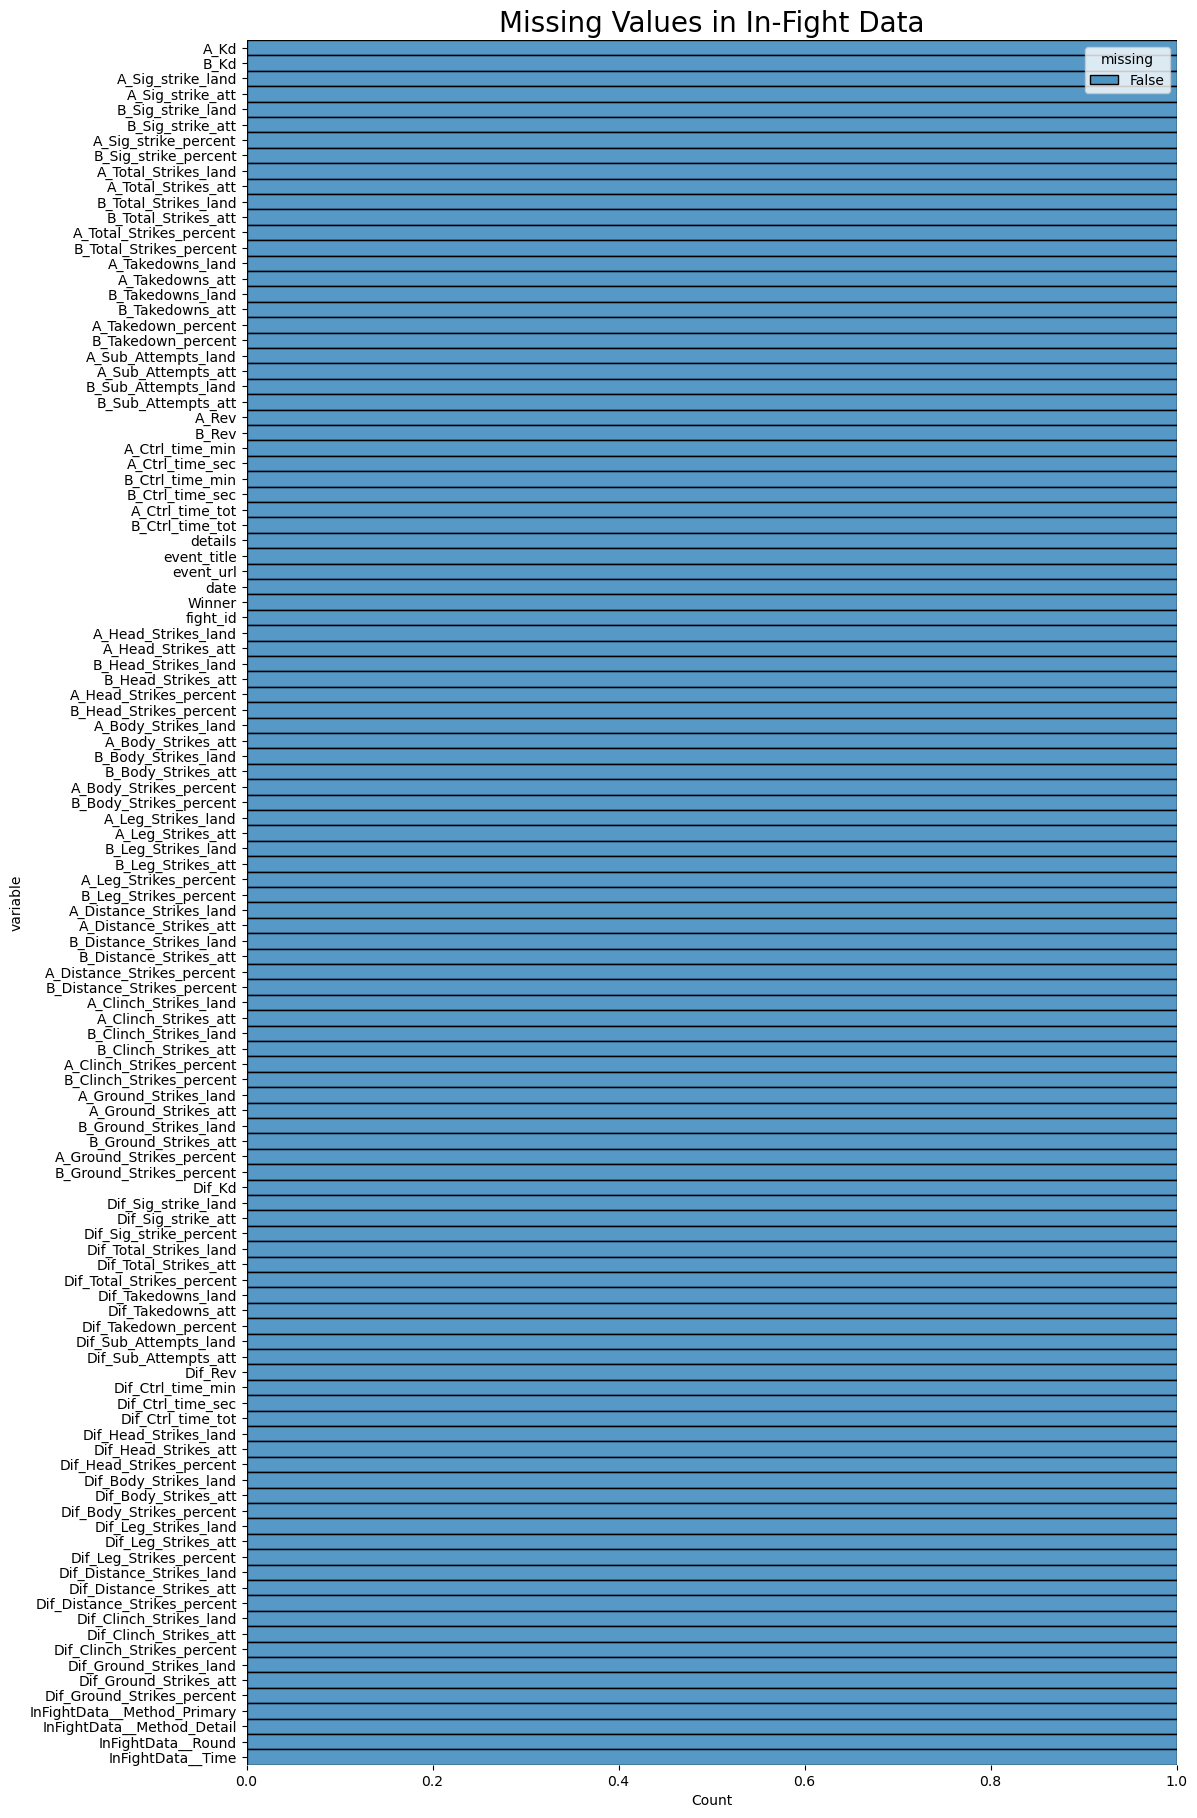

In [55]:
data_df = df[infight_metrics]
tot_cols = len(data_df.columns)

f, ax = plt.subplots(figsize = (12,tot_cols/5))

sns.despine(f, left=True, bottom=True)
sns.histplot(
    data = data_df.isna().melt(value_name='missing'),
    y= 'variable',
    hue = 'missing',
    multiple = 'fill', ax = ax)

# set title
ax.set_title('Missing Values in In-Fight Data', fontsize = 20)

All data is accounted for. Let's check on how these columns are distributed.

In [6]:
# Ensure the 'win?' column is numeric, or convert it to numeric type if necessary
# df['win?'] = df['win?'].astype(int)  # Uncomment and use this line if 'win?' needs to be converted

target_variable = 'win?'
num_cols = df.select_dtypes(include=np.number).columns.to_list()

# Remove the target variable from num_cols if it's there
num_cols = [col for col in num_cols if col != target_variable]

### In-Fight Variables (Intermediate Features)

In-fight variables are variables which are only available during the fight, i.e., they are unknowable before the fight. While they will not be a part of our model due to their unknowability, we can still check out the relationships in the data. 

In [7]:
# drop unnamed
unnamed = [col for col in df.columns if 'Unnamed' in col]
df.drop(columns=unnamed, inplace=True)
unnamed2 = [col for col in df.columns if 'unnamed' in col]
df.drop(columns=unnamed2, inplace=True)

In [8]:
# replace and INF with 0
df.replace([np.inf, -np.inf], 0, inplace=True)

In [11]:
ifd_cols = [col for col in df.columns if col in ''] + [target_variable]
num_cols = [col for col in df.columns if col in InFightData]

In [12]:
infightdata_df = df[ifd_cols]

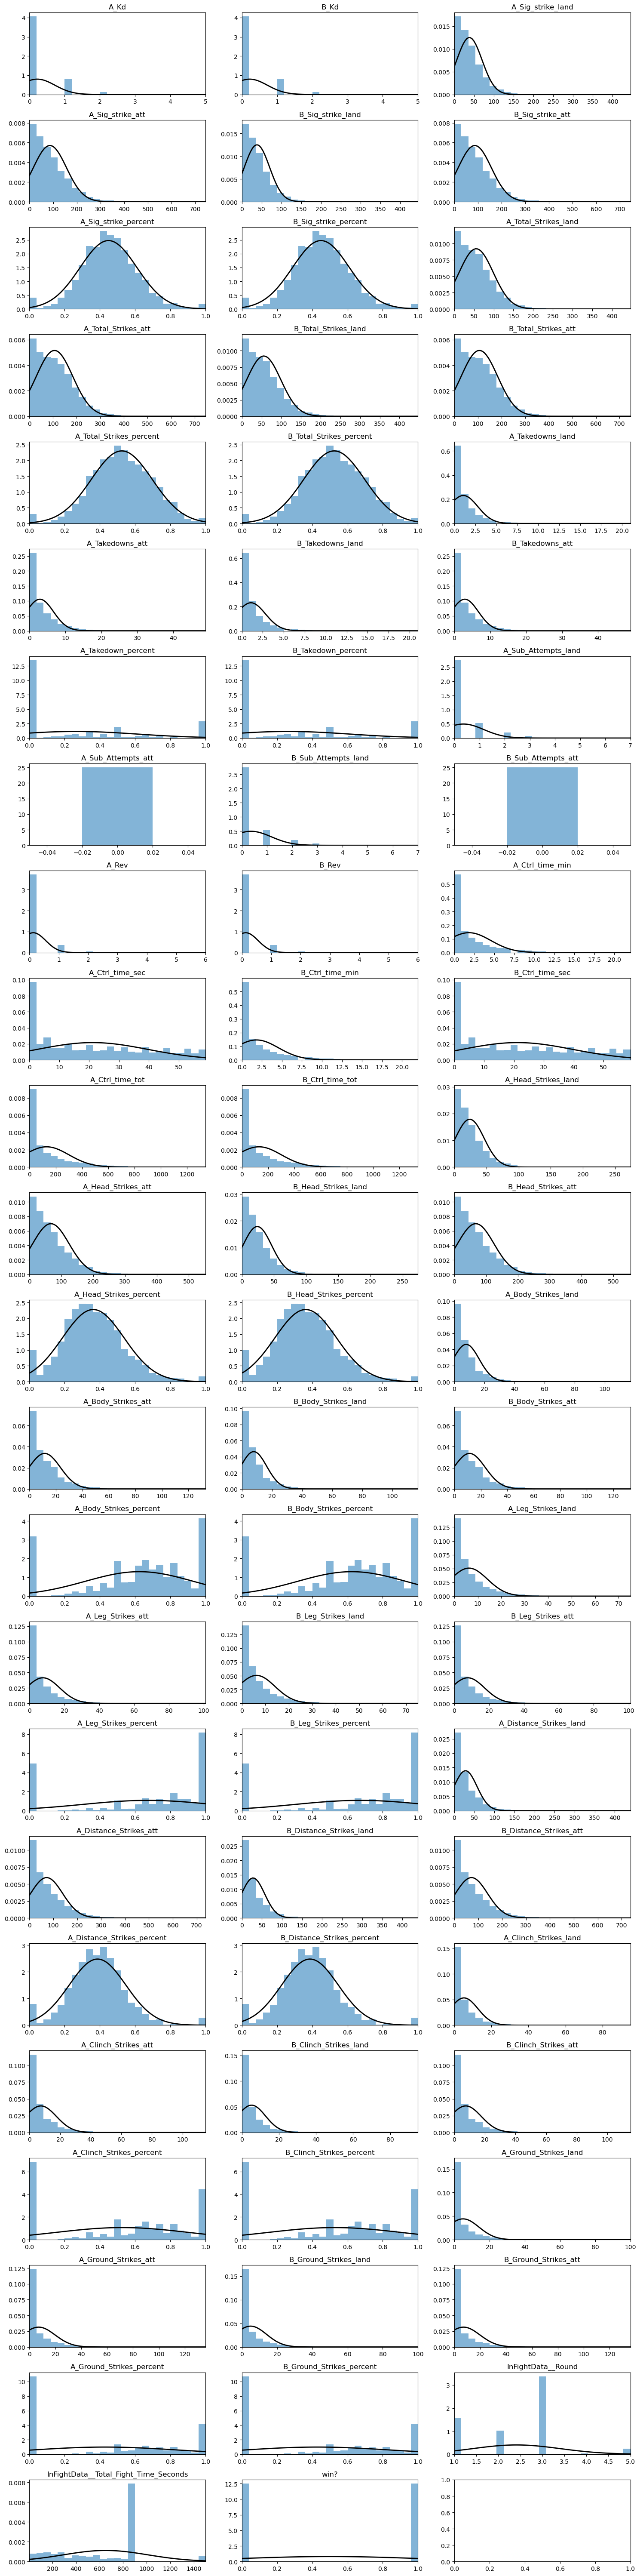

In [13]:
plot_df = infightdata_df

# Select only numeric columns
plot_df = plot_df.select_dtypes(include=[np.number])

# Drop rows with missing values
plot_df = plot_df.dropna()

ncols = 3
nrows = int(np.ceil(len(plot_df.columns) / ncols))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 60))
ax = ax.ravel()

for i, column in enumerate(plot_df.columns):
    data = plot_df[column]
    mu, std = norm.fit(data)
    x = np.linspace(np.min(data), np.max(data), 100)
    p = norm.pdf(x, mu, std)
    ax[i].hist(data, bins=25, density=True, alpha=0.6, color='#3182bd')
    ax[i].plot(x, p, 'k', linewidth=2)
    ax[i].set_title(column)
    ax[i].set_xlim(np.min(data), np.max(data))

plt.tight_layout()
plt.show()

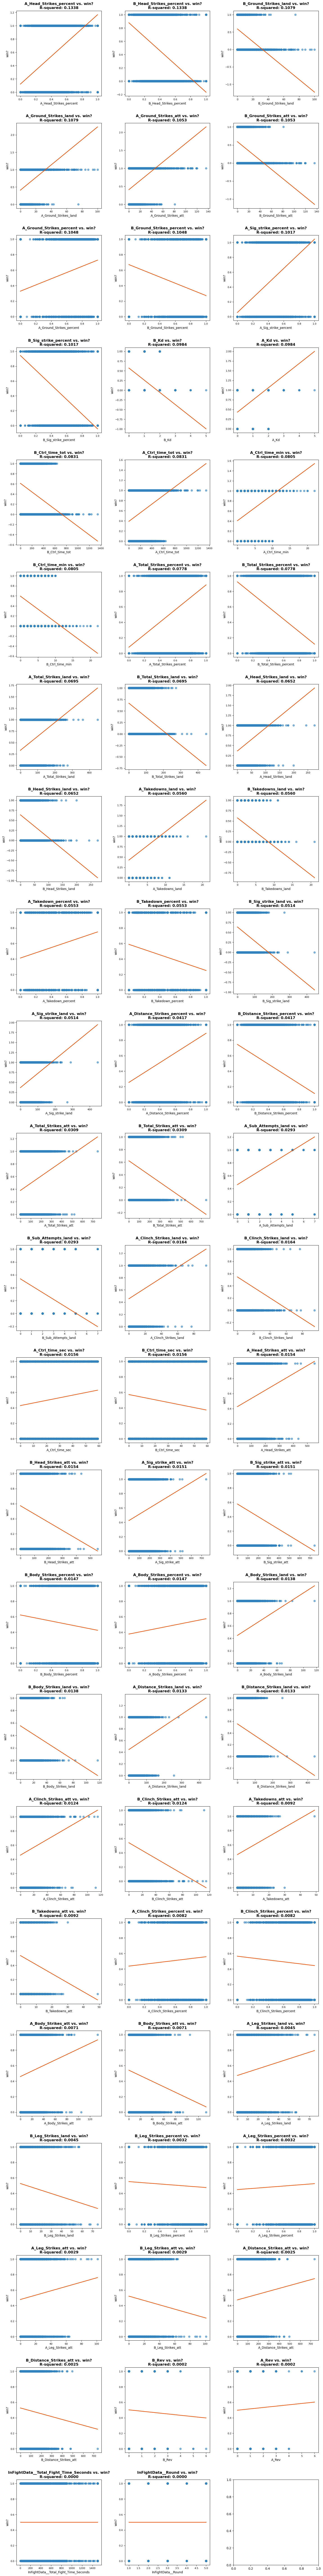

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

plot_df = infightdata_df

# Select only numeric columns, excluding the 'win?' column
numeric_columns = plot_df.select_dtypes(include=[np.number]).drop(columns=['win?'])

# Ensure the 'win?' column exists in the DataFrame
if 'win?' not in plot_df.columns:
    raise ValueError("Column 'win?' not found in the DataFrame.")

# Calculate R-squared values for all columns and store them in a list along with column names
r_squared_list = []
for column in numeric_columns.columns:
    x_data = plot_df[column].dropna()
    y_data = plot_df.loc[x_data.index, 'win?'].dropna()
    if len(np.unique(x_data)) < 2:
        continue
    slope, intercept = np.polyfit(x_data, y_data, 1)
    regression_line = np.poly1d([slope, intercept])
    r_squared = r2_score(y_data, regression_line(x_data))
    r_squared_list.append((column, r_squared))

# Sort the list by R-squared value in descending order
r_squared_list.sort(key=lambda x: x[1], reverse=True)

ncols = 3
nrows = int(np.ceil(len(r_squared_list) / ncols))

# Adjust figure size
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))
ax = ax.ravel()

# Plot the charts in the sorted order
for i, (column, r_squared) in enumerate(r_squared_list):
    x_data = plot_df[column]
    y_data = plot_df['win?']
    ax[i].scatter(x_data, y_data, alpha=0.6, color='#3182bd')  # Customize color

    # Calculate parameters of the regression line (slope and intercept)
    slope, intercept = np.polyfit(x_data, y_data, 1)
    # Create a polynomial function representing the regression line
    regression_line = np.poly1d([slope, intercept])

    # Generate x values for the regression line
    x_regression = np.linspace(np.min(x_data), np.max(x_data), 100)
    # Generate y values for the regression line using the polynomial function
    y_regression = regression_line(x_regression)

    # Plot the regression line
    ax[i].plot(x_regression, y_regression, 'r-', linewidth=2, color='#e6550d')  # Customize color

    # Customize title, labels, and font sizes
    ax[i].set_title(f'{column} vs. win?\nR-squared: {r_squared:.4f}', fontsize=12, fontweight='bold')
    ax[i].set_xlabel(column, fontsize=10)
    ax[i].set_ylabel('win?', fontsize=10)
    ax[i].tick_params(axis='both', which='major', labelsize=8)

# Adjust layout and spacing between subplots
plt.tight_layout(pad=3.0)
plt.show()

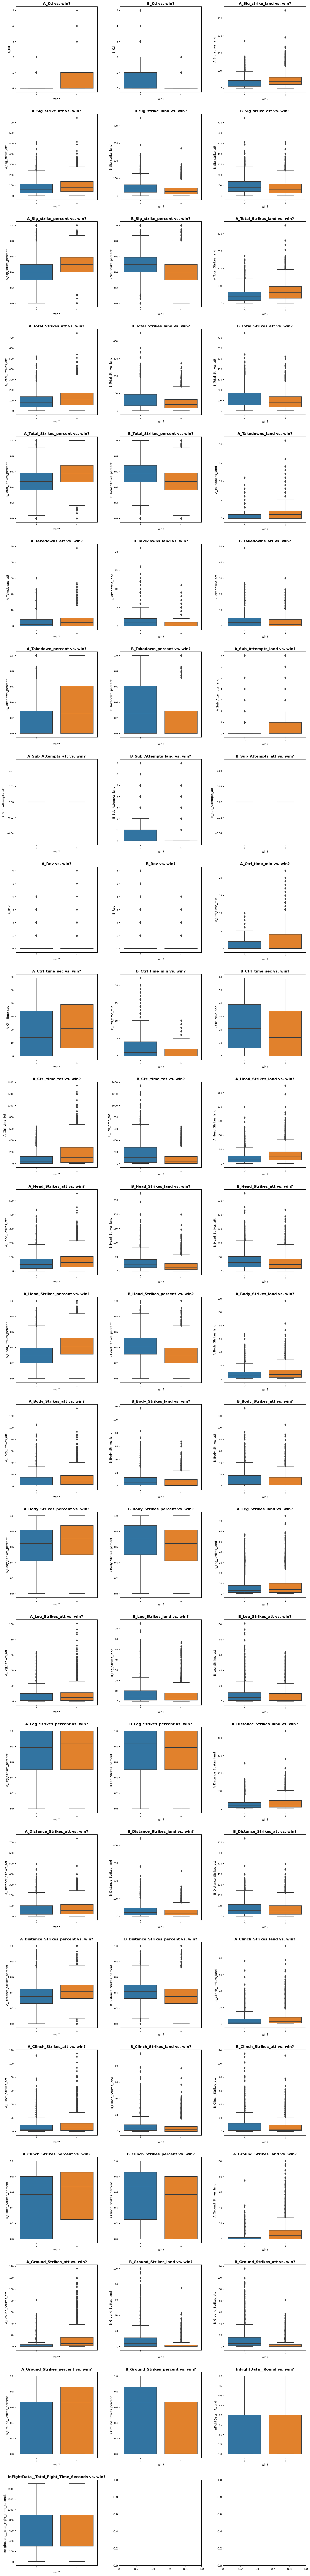

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = infightdata_df

# Select only numeric columns, excluding the 'win?' column
numeric_columns = plot_df.select_dtypes(include=[np.number]).drop(columns=['win?'])

# Ensure the 'win?' column exists in the DataFrame
if 'win?' not in plot_df.columns:
    raise ValueError("Column 'win?' not found in the DataFrame.")

ncols = 3
nrows = int(np.ceil(len(numeric_columns.columns) / ncols))

# Adjust figure size
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))
ax = ax.ravel()

# Plot the charts in the order of the columns
for i, column in enumerate(numeric_columns.columns):
    x_data = plot_df[column]
    y_data = plot_df['win?']
    
    # Prepare the data for the box plot
    box_plot_data = pd.concat([x_data, y_data], axis=1)
    
    # Plot the grouped box plot
    sns.boxplot(x='win?', y=column, data=box_plot_data, ax=ax[i])
    
    # Customize title, labels, and font sizes
    ax[i].set_title(f'{column} vs. win?', fontsize=12, fontweight='bold')
    ax[i].set_xlabel('win?', fontsize=10)
    ax[i].set_ylabel(column, fontsize=10)
    ax[i].tick_params(axis='both', which='major', labelsize=8)

# Adjust layout and spacing between subplots
plt.tight_layout(pad=3.0)
plt.show()

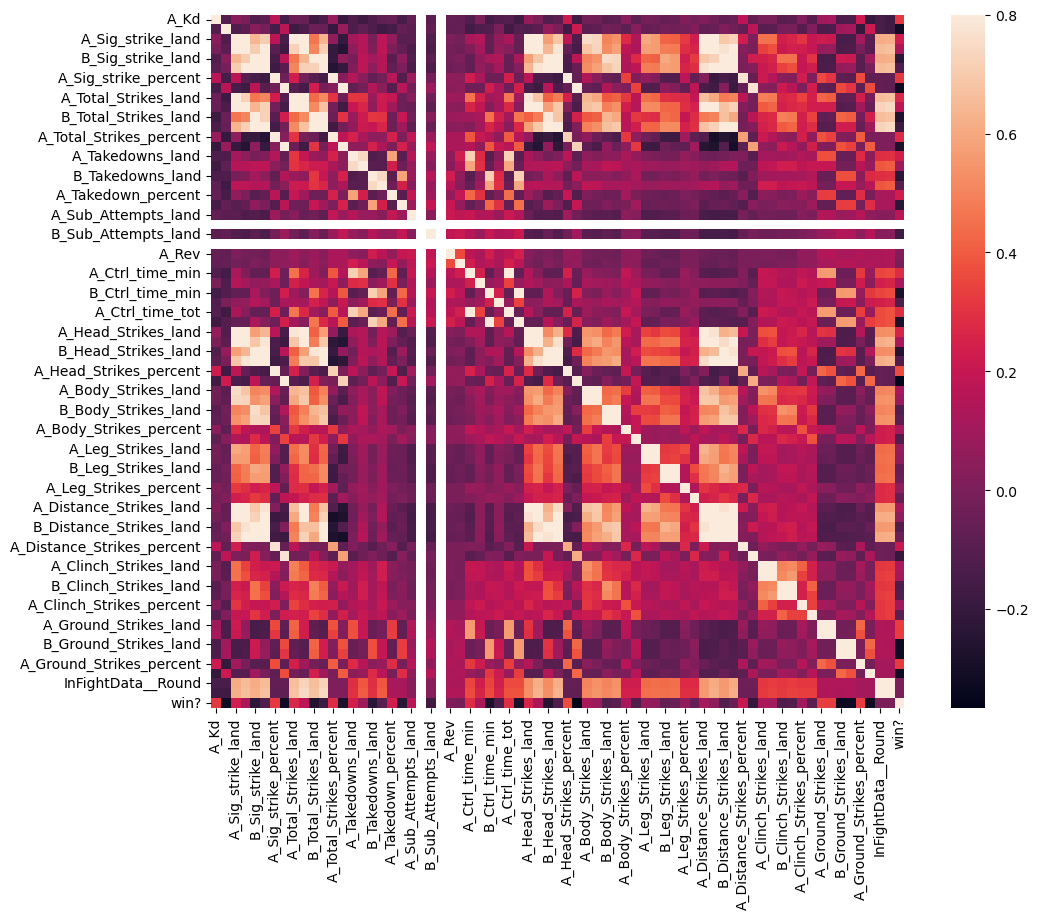

In [16]:
# correlation matrix
corrmat = infightdata_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

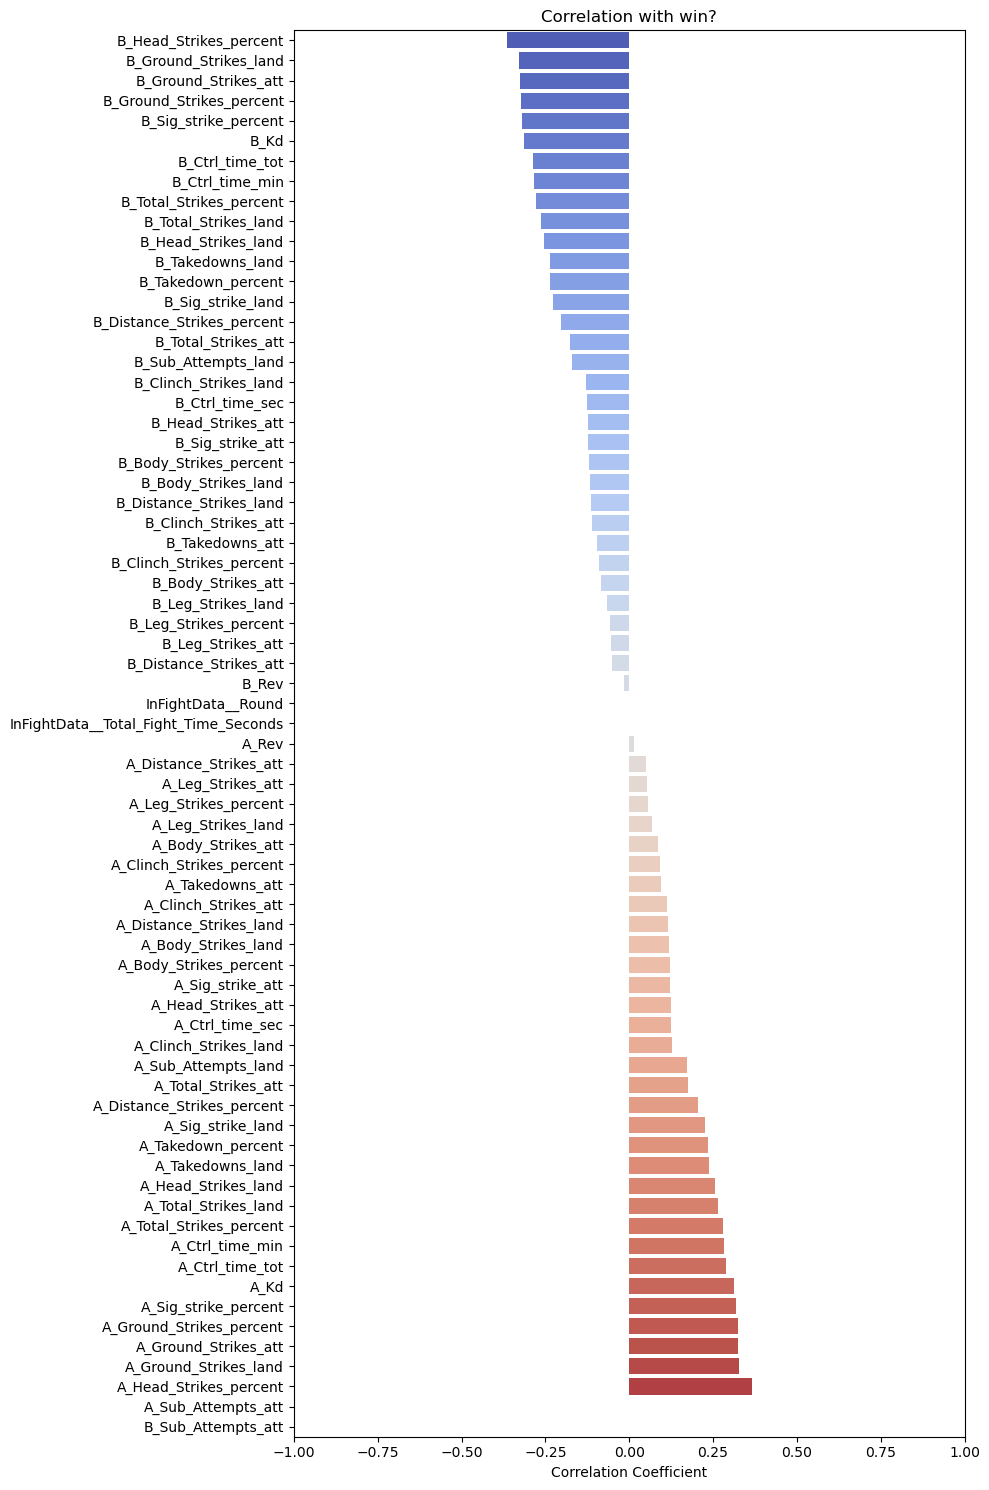

In [19]:

# Select only numeric columns, excluding the 'win?' column
numeric_columns = infightdata_df.select_dtypes(include=[np.number]).drop(columns=['win?'])


# Calculate the correlation coefficients between each numeric column and the 'win?' column
correlations = numeric_columns.corrwith(infightdata_df['win?']).sort_values()

# Plot the correlation coefficients as a vertical bar plot
plt.figure(figsize=(10, 15))  # Adjust figure size as needed
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm', orient='h')
plt.title('Correlation with win?')
plt.xlabel('Correlation Coefficient')
plt.xlim(-1, 1)  # Set x-axis limits to show full range of correlation coefficients
plt.tight_layout()
plt.show()
